In [8]:
# pipenv install scikit-learn pandas numpy scipy matplotlib seaborn ipykernel gradio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Carregar o conjunto de dados
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [10]:
# Checar a estrutura do DataFrame
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [11]:
# Remover a coluna 'id' que não é relevante para a análise
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [12]:
# Renomear colunas para facilitar o acesso
df_colesterol.columns = [
  'grupo_sanguineo', 
  'fumante', 
  'nivel_atividade_fisica', 
  'idade', 
  'peso', 
  'altura', 
  'colesterol']

In [13]:
# Colar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [14]:
# Colar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

### **EDA**

In [15]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [16]:
# Verificar os valores possível
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [17]:
# Detectar valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
colesterol                0
dtype: int64

In [18]:
# Medidas estatísiticas do DataFrame
df_colesterol_eda.describe()

,idade,peso,altura,colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [19]:
# Coletar medidas das variáveis categóricas
moda_grupo_sanguineo = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade_fisica = df_colesterol_eda.nivel_atividade_fisica.mode()

In [20]:
# Coletar medidas das variáveis numéricas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [21]:
# Inputar valores ausentes
df_colesterol_eda.fillna({
  'grupo_sanguineo': moda_grupo_sanguineo[0],
  'fumante': moda_fumante[0],
  'nivel_atividade_fisica': moda_nivel_atividade_fisica[0],
  'idade': mediana_idade,
  'peso': mediana_peso,
  'altura': mediana_altura
}, inplace=True)

In [22]:
# Converter idade e altura para inteiros
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [23]:
# Estrutura do DataFrame após o tratamento de dados
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   colesterol              1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [24]:
# Visualizar o DataFrame tratado
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


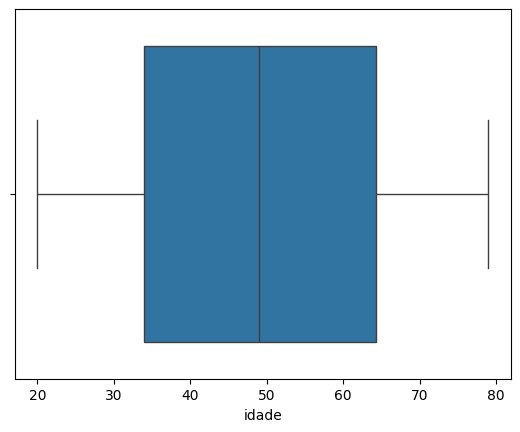

In [25]:
# Verificar/detectar valores outliers incomuns no DataFrame tratado
sns.boxplot(data=df_colesterol_eda, x='idade')
plt.show()

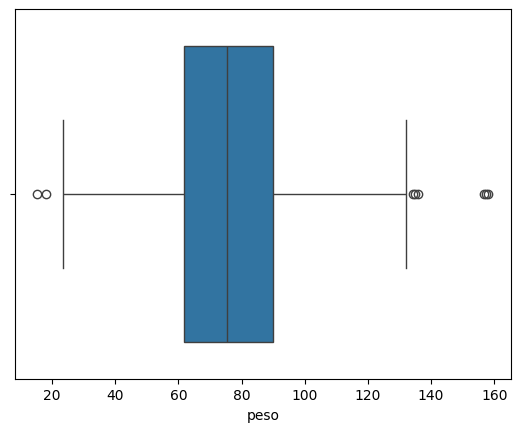

In [26]:
# Verificar/detectar valores outliers incomuns no DataFrame tratado
sns.boxplot(data=df_colesterol_eda, x='peso')
plt.show()

In [27]:
# Devido aos outliers incomuns, decidimos não tratar/remover esses valores para manter 
# a integridade do conjunto de dados.

# Filtrar o público a ser removido
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

In [28]:
# Remover o público com peso menor que 40kg
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

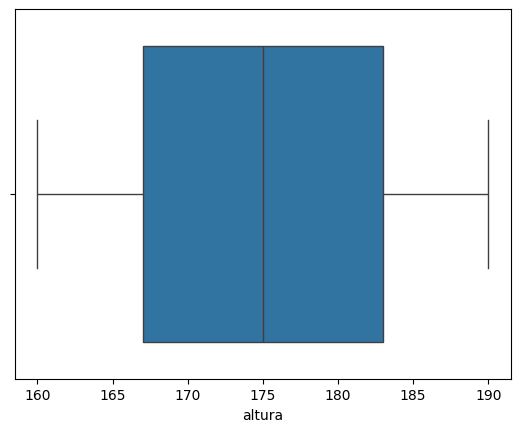

In [29]:
# Verificar/detectar valores outliers incomuns no DataFrame tratado
sns.boxplot(data=df_colesterol_eda, x='altura')
plt.show()

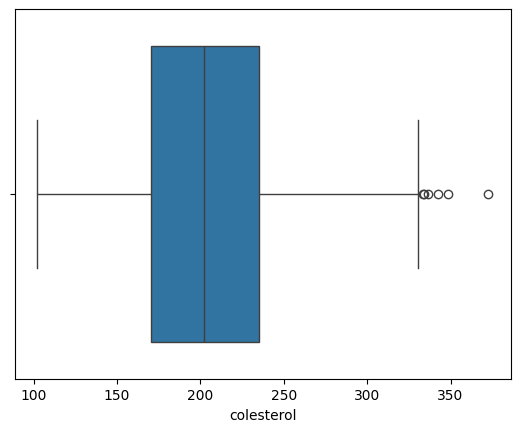

In [30]:
# Verificar/detectar valores outliers incomuns no DataFrame tratado
sns.boxplot(data=df_colesterol_eda, x='colesterol')
plt.show()

<Axes: xlabel='grupo_sanguineo', ylabel='colesterol'>

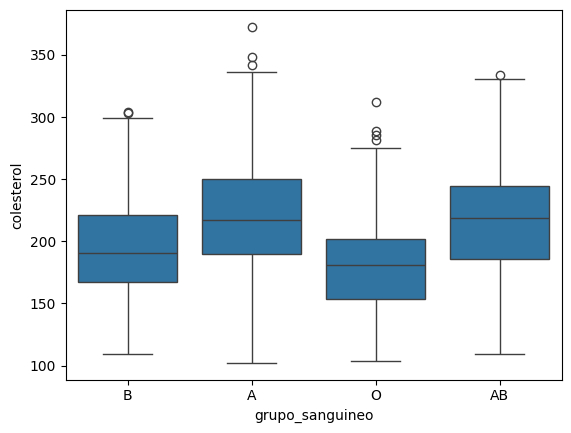

In [31]:
# Cruzamento de variáveis categóricas com nivel de colesterol
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='colesterol')

<Axes: xlabel='fumante', ylabel='colesterol'>

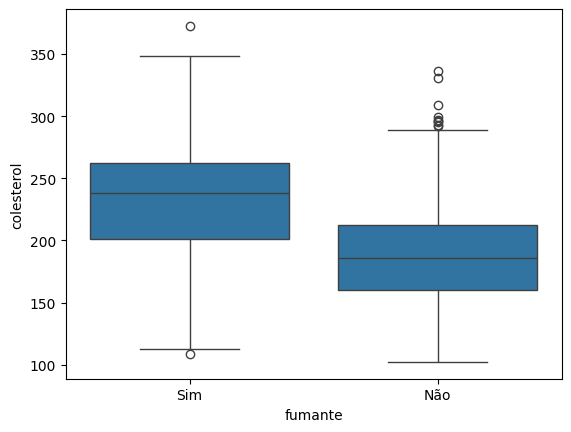

In [32]:
# Cruzamento de variáveis categóricas com nivel de colesterol
sns.boxplot(data=df_colesterol_eda, x='fumante', y='colesterol')

<Axes: xlabel='nivel_atividade_fisica', ylabel='colesterol'>

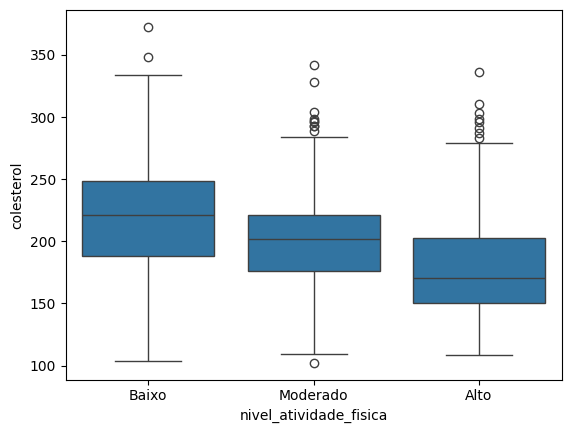

In [33]:
# Cruzamento de variáveis categóricas com nivel de colesterol
sns.boxplot(data=df_colesterol_eda, x='nivel_atividade_fisica', y='colesterol')

<Axes: xlabel='idade', ylabel='colesterol'>

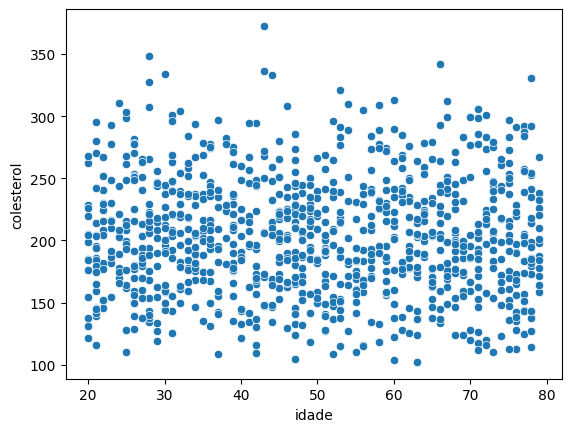

In [34]:
# Correlação das variáveis numéricas com nivel de colesterol (idade)
sns.scatterplot(data=df_colesterol_eda, x='idade', y='colesterol')  

<Axes: xlabel='peso', ylabel='colesterol'>

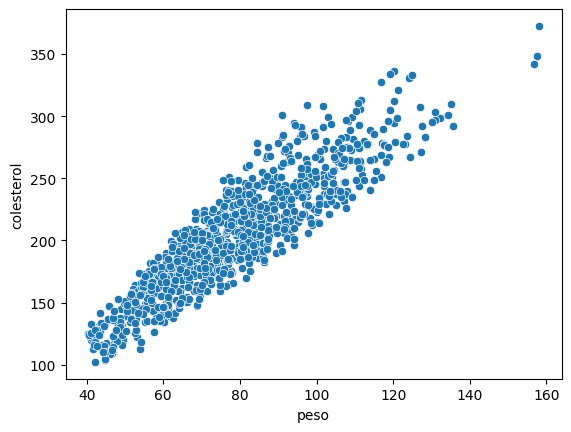

In [35]:
# Correlação das variáveis numéricas com nivel de colesterol (peso)
sns.scatterplot(data=df_colesterol_eda, x='peso', y='colesterol')  

<Axes: xlabel='altura', ylabel='colesterol'>

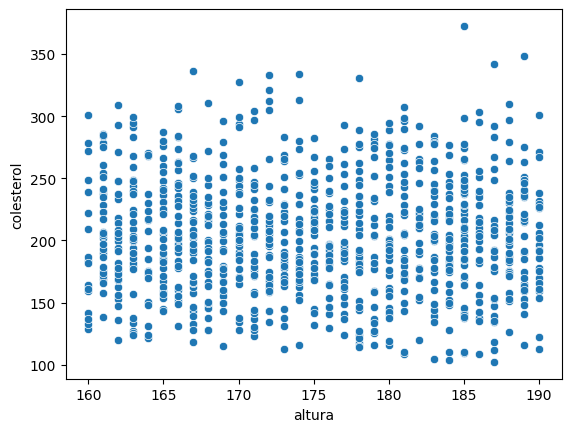

In [36]:
# Correlação das variáveis numéricas com nivel de colesterol (altura)
sns.scatterplot(data=df_colesterol_eda, x='altura', y='colesterol')  

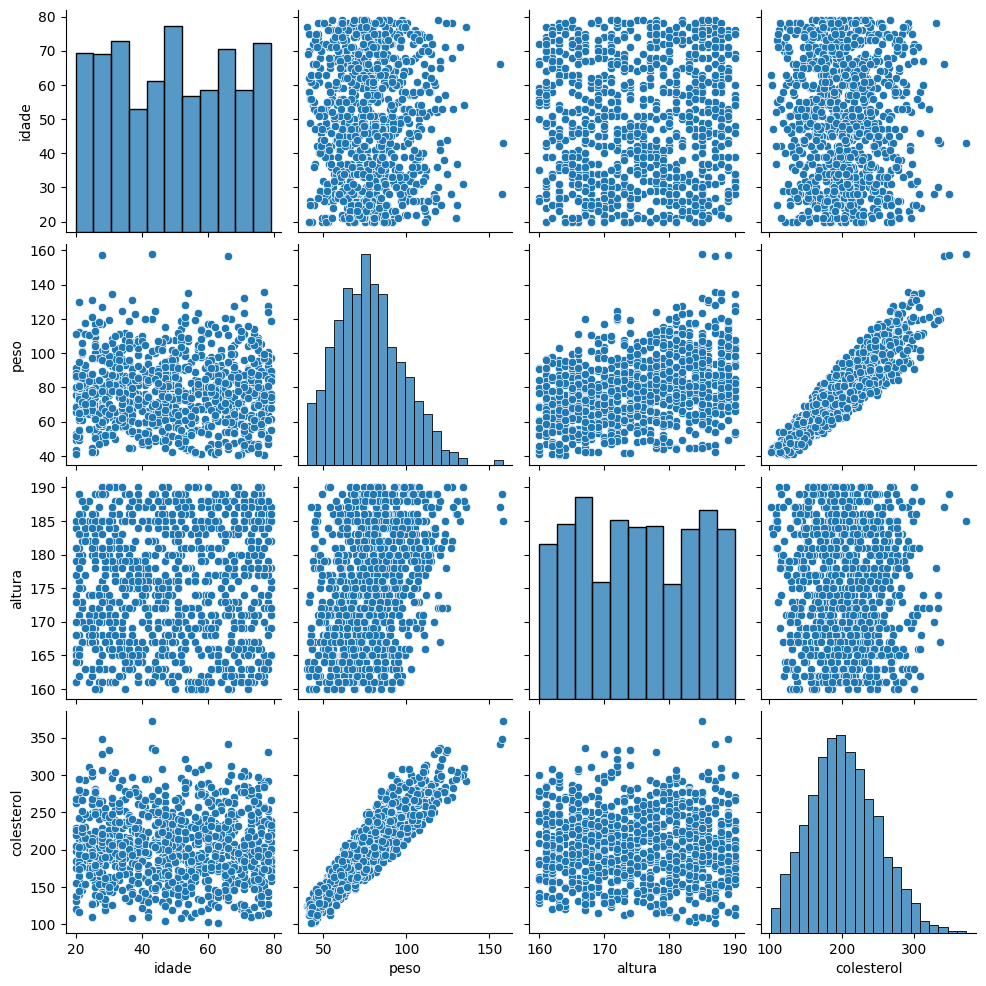

In [37]:
sns.pairplot(df_colesterol_eda)
plt.show()

In [38]:
# Converter variáveis categóricas nominais em variáveis numéricas usando One-Hot Encoding do Pandas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [39]:
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [40]:
# Converter variável cadategórica ordinal em númerica usando o fatorização do Pandas
df_colesterol_eda['nivel_atividade_fisica'] = pd.factorize(df_colesterol_eda['nivel_atividade_fisica'])[0] + 1

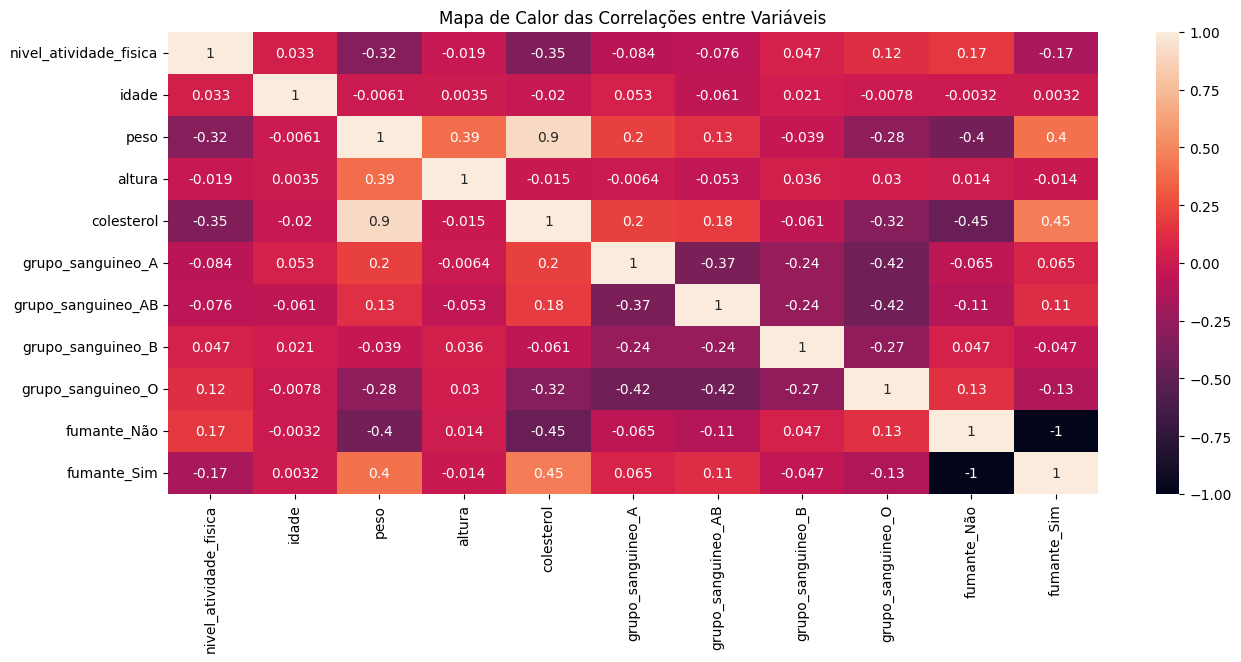

In [41]:
# Mapa de Calor com correlações entre as variáveis
# Quanto mais próximo de 1 maior correlação positiva e mais próximo de -1 maior correlação negativa. Ex.: colesterol x peso
plt.figure(figsize=(15, 6))
sns.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1,annot=True)
plt.title('Mapa de Calor das Correlações entre Variáveis')
plt.show()

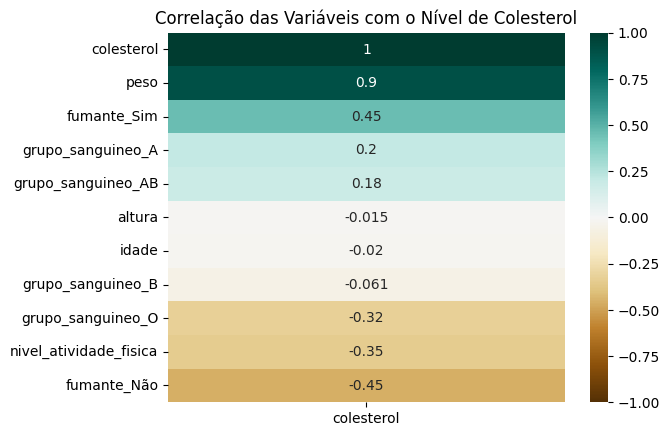

In [42]:
# Formato de Ranking, somente a correlação com a variável alvo (colesterol)
sns.heatmap(df_colesterol_eda.corr()['colesterol'].sort_values(ascending=False).to_frame(), vmin=-1, vmax=1, cmap='BrBG', annot=True)
plt.title('Correlação das Variáveis com o Nível de Colesterol')
plt.show()

In [43]:
# Bucketing 
# Atualmente o DataFrame possui range de idade de 20 - 79 anos.
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_colesterol_bucketing['faixa_etaria'] = pd.cut(x=df_colesterol_bucketing['idade'], 
                                                 bins=bins_idade, labels=labels_idade, include_lowest=True)

In [44]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,colesterol,faixa_etaria
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


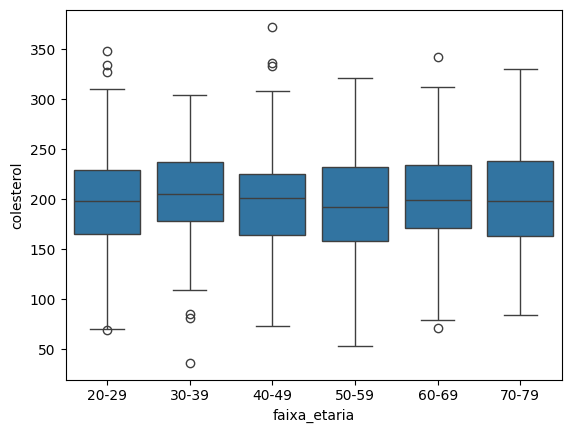

In [45]:
sns.boxplot(data=df_colesterol_bucketing, x='faixa_etaria', y='colesterol')
plt.show()

In [46]:
# Bucketing (Peso)
# Atualmente o DataFrame possui range de peso de 40 - 79 anos.
bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_colesterol_bucketing['faixa_peso'] = pd.cut(x=df_colesterol_bucketing['peso'], 
                                               bins=bins_peso, labels=labels_peso, include_lowest=True)

In [47]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,colesterol,faixa_etaria,faixa_peso
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39,80-89
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69,100-109
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29,60-69
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49,120-129
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79,80-89
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59,110-119
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39,80-89
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69,80-89
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49,NaN


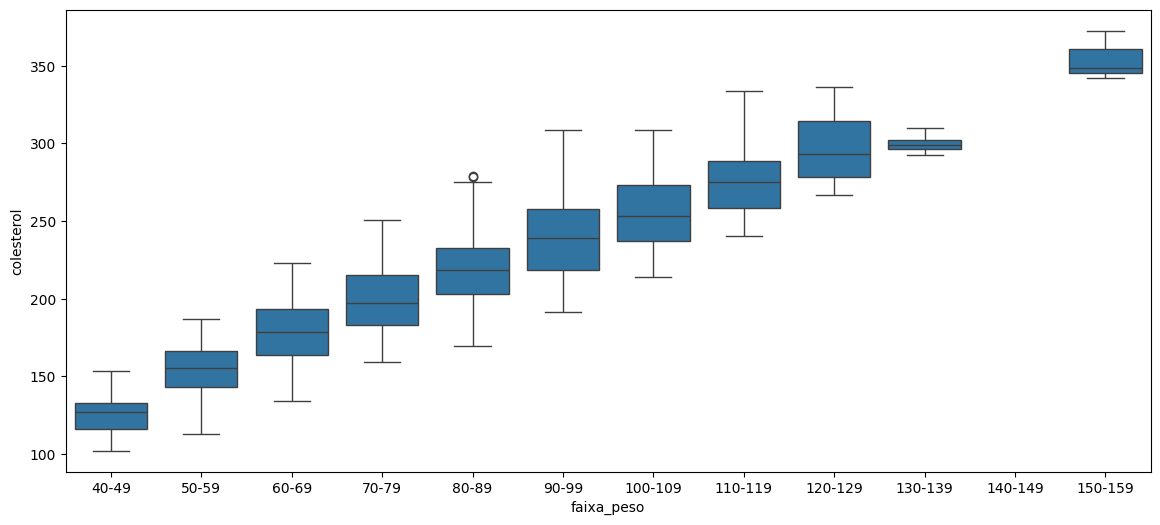

In [48]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_colesterol_bucketing, x='faixa_peso', y='colesterol')
plt.show()

### **Preparar Dataset para treinamento**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [50]:
# Criar Dataset de Treino e Teste
# Remover o público com peso menor que 40kg
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].index, axis=0, inplace=True)
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         960 non-null    object 
 1   fumante                 960 non-null    object 
 2   nivel_atividade_fisica  959 non-null    object 
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   colesterol              963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [51]:
X = df_colesterol.drop(columns=['colesterol'], axis=1)
y = df_colesterol['colesterol']

In [52]:
# Split dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [53]:
# Pipeline
# Input da moda nas variáveis categóricas - grupo_sanguineo, fumante, nivel_atividade_fisica
# Padronizar variáveis numéricas - idade, peso, altura
# One Hot Encoding variáveis categóricas nominais - grupo_sanguineo, fumante
# Ordinal Encoding variáveis categóricas ordinais - nivel_atividade_fisica
# Input da mediana nas variáveis numéricas - idade, peso, altura

# Nomes das Colunas por tipo de dado
numeric_features = ['idade', 'peso', 'altura']
categorical_nominal_features = ['grupo_sanguineo', 'fumante']
categorical_ordinal_features = ['nivel_atividade_fisica']

In [54]:
# Transformer Categóricas
transformer_categorical_nominal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [55]:
# Transformer Ordinais
transformer_categorical_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
])

In [56]:
# Transformer Numéricas
transformer_numeric = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [57]:
# Criar um column transformer que encapsula os transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, numeric_features),
        ('cat_nom', transformer_categorical_nominal, categorical_nominal_features),
        ('cat_ord', transformer_categorical_ordinal, categorical_ordinal_features)
    ]
)

In [58]:
# Criando o pipeline completo com o modelo de regressão linear
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [59]:
# Treinar o modelo
model_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat_nom', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different tr

### **Análise de Métricas**

In [60]:
# Gerar a predição no conjunto de teste
y_pred = model_pipeline.predict(X_test)

In [61]:
# R2 Score no conjunto de treino: Avaliar se a variância das váriaveis explicativas explica a variância da variável alvo
# Quanto mais próximo de 1 melhor o modelo
# A variável "colesterol" é explicada em aproximadamente 60% pelas variáveis preditoras.
r2_train = r2_score(y_test, y_pred)
print(f'R2 Score no conjunto de treino: {r2_train:.4f}')

R2 Score no conjunto de treino: 0.9594


In [62]:
# Mean Absolute Error (MAE): Média dos erros absolutos entre os valores reais e os valores previstos pelo modelo
# Se o MAE for baixo, o modelo é considerado bom
# Levando em consideração que o nível de colesterol varia entre 100 e 300, um MAE em torno de 7 pode ser considerado aceitável.
mean_absolute_error(y_test, y_pred)

7.313838031022507

In [63]:
# Mean Squared Error (MSE): Média dos erros quadráticos entre os valores reais e os valores previstos pelo modelo
# Um erro quadrático é uma forma de medir o quanto um valor estimado ou previsto se afasta do valor real, elevando essa diferença ao quadrado.
# Por que elevar ao quadrado?
#  * Evita que erros positivos e negativos se anulem
#  * Penaliza mais fortemente erros grandes
#  * Garante que o erro seja sempre positivo
mean_squared_error(y_test, y_pred) ** 0.5

9.097649246487036

In [64]:
# Root Mean Squared Error (RMSE): Raiz quadrada do MSE, trazendo a métrica para a mesma escala dos valores previstos
# O método root_mean_squared_error existe no scikit-learn e é uma forma direta e explícita de calcular o RMSE, sem precisar usar o parâmetro squared=False.
# 👉 Ele foi introduzido para deixar o código mais claro semanticamente.
root_mean_squared_error(y_test, y_pred)

9.097649246487036

### **Análise de Resíduos**

In [65]:
# Calcular Resíduos
residuos = y_test - y_pred

In [66]:
# Transformar os resíduos na escala padrão (média 0 e desvio padrão 1)
# (X - média) / desvio padrão
from scipy.stats import zscore
residuos_padronizados = zscore(residuos)

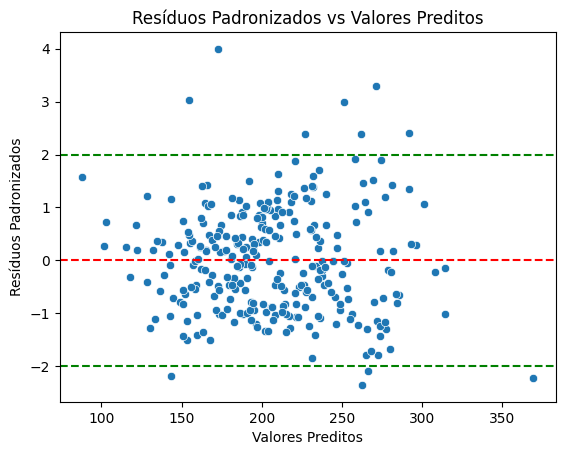

In [67]:
# Verificar/Visualizar a linearidade dos resíduos: Valores entre -2 e 2 são aceitáveis (Escala Padrão)
# Verificar a homocedasticidade: Distribuição aleatória dos resíduos
sns.scatterplot(x=y_pred, y=residuos_padronizados)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=2, color='g', linestyle='--')
plt.axhline(y=-2, color='g', linestyle='--')
plt.title('Resíduos Padronizados vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos Padronizados')
plt.show()

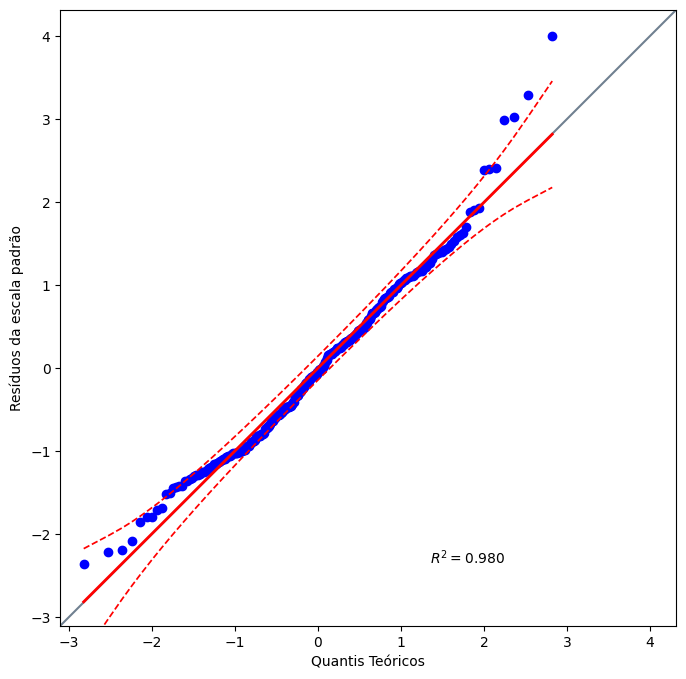

In [68]:
# Checar se resíduos seguem uma distribuição normal
# QQ Plot 
import pingouin as pg
plt.figure(figsize=(14, 8))
pg.qqplot(residuos_padronizados, dist='norm')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos da escala padrão')
plt.show()

### **Teste de Normalidade de Resíduos**

In [ ]:
# Teste de Normalidade de Shapiro-Wilk
from scipy.stats import shapiro

stat, p_value = shapiro(residuos)
print(f'Statística de Teste: {stat:.4f}, Valor-p: {p_value:.4f}')

Statística de Teste: 0.9808, Valor-p: 0.0006


In [80]:
# Teste de Kolmogorov-Smirnov
from scipy.stats import kstest

stat, p_value = kstest(residuos, 'norm')
print(f'Statística de Teste: {stat:.4f}, Valor-p: {p_value:.4f}')

Statística de Teste: 0.4246, Valor-p: 0.0000


In [84]:
# Teste de Lilliefors
from statsmodels.stats.diagnostic import lilliefors

stat, p_value = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f'Statística de Teste: {stat:.4f}, Valor-p: {p_value:.4f}')

Statística de Teste: 0.0496, Valor-p: 0.1253


In [86]:
# Teste de Anderson-Darling
from scipy.stats import anderson

stat, critical_values, significance_levels = anderson(residuos, dist='norm')

In [87]:
stat

np.float64(0.9169275158490109)

In [88]:
critical_values

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [89]:
significance_levels

array([15. , 10. ,  5. ,  2.5,  1. ])

In [92]:
# Se stat é maior que o valor crítico para o nível de significância de 5%, podemos rejeitar a hipótese nula de que os resíduos seguem uma distribuição normal (H0).
print(f'Estatística de Teste: {stat:.4f}, Valor Crítico: {critical_values[2]:.4f}')

Estatística de Teste: 0.9169, Valor Crítico: 0.7760


In [96]:
# Teste de Homocedasticidade de Goldfeld-Quandt
from statsmodels.stats.diagnostic import het_goldfeldquandt

pipe = Pipeline(steps=[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

In [97]:
X_test_transformed

array([[-1.44340738,  0.22608781, -0.58669129, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.20886474, -1.05685776, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.84754575, -0.35160806, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.09014564, -1.52702423, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099,  0.17447081, -0.35160806, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.65277092, -1.17439938, ...,  0.        ,
         1.        ,  0.        ]], shape=(289, 10))

In [ ]:
# O Teste mostrou que não podemos rejeitar a hipótese nula de homocedasticidade (H0), 
# pois, o valor-p é maior que 0.05.
test_goldfeldquandt = het_goldfeldquandt(residuos, X_test_transformed)
stat = test_goldfeldquandt[0]
p_value = test_goldfeldquandt[1]

print(f'Estatística de Teste: {stat:.4f}, Valor-p: {p_value:.4f}')

Estatística de Teste: 0.6716, Valor-p: 0.9894


### **Predição de Valores e Salvando o Modelo**

In [106]:
predicao = {
  'grupo_sanguineo': 'O',
  'fumante': 'Não',
  'nivel_atividade_fisica': 'Alto',
  'idade': 40,
  'peso': 70,
  'altura': 180
}
sample_df = pd.DataFrame(predicao, index=[1])

In [107]:
sample_df

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura
1,O,Não,Alto,40,70,180


In [108]:
# Predição do nível de colesterol para o novo paciente
model_pipeline.predict(sample_df)

array([165.32375099])